# 🔍 Credit Card Fraud Detection — Detailed Problem Statement

---

## **1. Overview**
Credit card companies process millions of transactions every day. A small fraction are fraudulent. Detecting these frauds in real-time is crucial to prevent financial loss and protect customer trust.

A major challenge is **class imbalance** — typically less than **0.2%** of transactions are fraudulent.

---

## **2. Objective / Goal**
The goal is to build a **machine learning model** that can detect fraudulent transactions accurately.

### ✔️ Primary Goals:
- Detect fraudulent transactions with **high recall**.
- Minimize **false positives** to avoid blocking genuine customers.
- Handle **imbalanced datasets** effectively.

---

## **3. Business Impact**
A robust fraud detection system helps:

- Prevent massive financial losses.
- Protect bank and customer reputation.
- Reduce workload of manual fraud analysis.
- Enable automated real-time fraud alerts.

---

## **4. ML Task Type**
- **Binary Classification** → (Fraud: 1, Normal: 0)
- Also related to **Anomaly Detection**, since fraudulent patterns differ significantly from normal behaviour.

---

## **5. Key Challenges**
| Challenge | Explanation |
|----------|------------|
| Imbalanced dataset | Fraud cases <0.2% |
| Real-time detection | Must be fast and efficient |
| Data privacy | PCA transformation used for feature masking |
| Cost of misclassification | False negatives = financial loss, false positives = bad customer experience |

---

## **6. Dataset Description**

Typical dataset contains:

| Feature Type | Example |
|--------------|---------|
| Transaction features | Amount, Time |
| PCA-transformed features | V1–V28 (masked for privacy) |
| Target Label | 0 = Normal, 1 = Fraud |

Dataset used: **Kaggle – Credit Card Fraud Detection**  
Rows: **284,807 transactions**  
Fraud cases: **492**

---

## **7. Techniques Used**

### **Data Preprocessing**
- Feature scaling
- Outlier detection
- Imbalanced data handling (SMOTE, undersampling)

### **Modelling Techniques**
- Logistic Regression
- Random Forest
- XGBoost / SVM
- Isolation Forest / One-Class SVM (Anomaly detection)

---

## **8. Evaluation Metrics**

Accuracy is misleading due to imbalance, so we rely on:

- Precision
- Recall → **Most important metric**
- F1-score
- ROC-AUC
- Precision-Recall Curve
- Confusion Matrix

---

## **9. Expected Outcome**
Develop a fraud detection model with:

- **High recall**
- **Low false alarms**
- Effective performance on highly imbalanced data

This will help in improving fraud detection accuracy and financial security.

---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [14]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.info()
df.describe()
df['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64

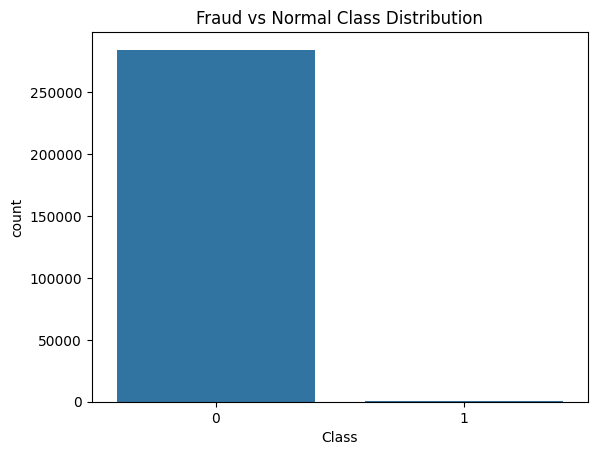

In [16]:
#Visualize Class Imbalance
sns.countplot(data=df, x='Class')
plt.title("Fraud vs Normal Class Distribution")
plt.show()


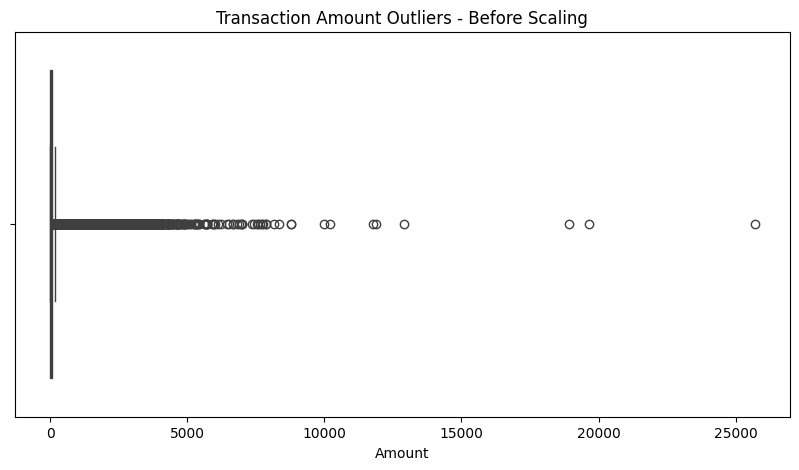

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Amount'])
plt.title("Transaction Amount Outliers - Before Scaling")
plt.show()


In [18]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



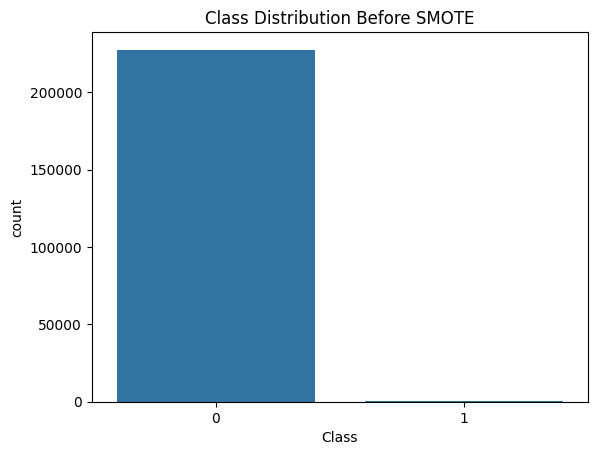

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.show()


###  Why SMOTE is Used?

In credit card fraud detection, the dataset is **highly imbalanced** — the majority class (legitimate transactions) is significantly larger than the minority class (fraud cases).  
Because of this, many machine learning models tend to predict everything as *non-fraud* to achieve high accuracy, which is misleading.

Example:
- 99.8% legitimate
- 0.2% fraud

A model predicting **all transactions as safe** would still show **99.8% accuracy**, but it would **fail to detect fraud** — which is the actual goal.

---

###  What is SMOTE?

**SMOTE (Synthetic Minority Oversampling Technique)** is a resampling technique used to handle imbalanced datasets.  
Instead of simply duplicating minority samples (which can lead to overfitting), SMOTE **creates synthetic new samples** by interpolating between existing minority-class data points.

Example:  
SMOTE finds a fraud sample → looks at its nearest minority neighbors → generates new synthetic points in between.

---

###  How SMOTE Helps

 Balances the training dataset  
 Helps the model learn patterns from fraud cases  
 Reduces model bias toward majority class  
 Improves Recall and F1-Score (important for fraud detection)

---

### Important Note

SMOTE is applied **only on the training data**, not on the test data, to avoid data leakage.  
This ensures the model does not learn from artificially created samples during evaluation.


“SMOTE is used because the dataset is highly imbalanced. Instead of duplicating minority samples, it synthetically generates new ones using nearest-neighbor interpolation. This helps the model learn fraud patterns better and improves recall without overfitting.”

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


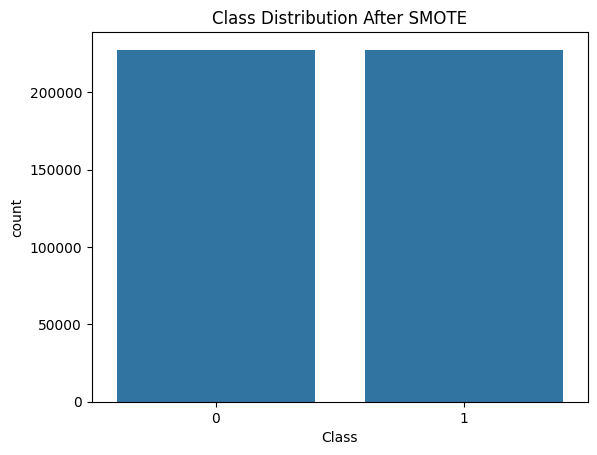

In [23]:
sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE")
plt.show()


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


###  Why Random Forest Was Chosen Over Logistic Regression

Both Logistic Regression and Random Forest were tested, but Random Forest performed better for this dataset.  
The main reasons are:

---

#### 1. Dataset Is Not Linearly Separable  
Logistic Regression assumes a **linear decision boundary**, meaning it tries to separate classes using a straight line (or hyperplane).  
Fraud patterns in financial transactions are often **non-linear and complex**, so Logistic Regression struggles to capture hidden relationships.

Random Forest, on the other hand, is a **tree-based model** that naturally handles:
- Non-linear boundaries  
- Complex interactions between features  
- Irregular patterns typical in fraud behavior  

---

####  2. Handles Imbalanced Data Better  
Logistic Regression tends to favor the **majority class**, especially when the dataset is heavily imbalanced.  
Random Forest uses:
- `class_weight='balanced'` internally (when enabled)
- Bootstrapping and voting  
which helps it detect minority fraud cases more effectively.

This typically improves metrics like **Recall and ROC-AUC**, which are critical in fraud detection.

---

####  3. Feature Importance & Interpretability  
Random Forest provides a **feature importance score**, which helps understand which variables contribute most to detecting fraud.

Logistic Regression only shows coefficients, which may not capture interaction effects clearly.

---

####  4. Better Handling of Noise and Outliers  
Tree-based methods like Random Forest are robust against:
- Outliers  
- Skewed distributions  
- Noisy variance in transaction amounts  

Logistic Regression can get unstable if scaling or outlier handling is not perfect.

---


### Final 

> **Random Forest was selected because it provided higher recall and ROC-AUC, handled non-linear patterns in fraud behavior, and performed better on imbalanced data compared to Logistic Regression.**


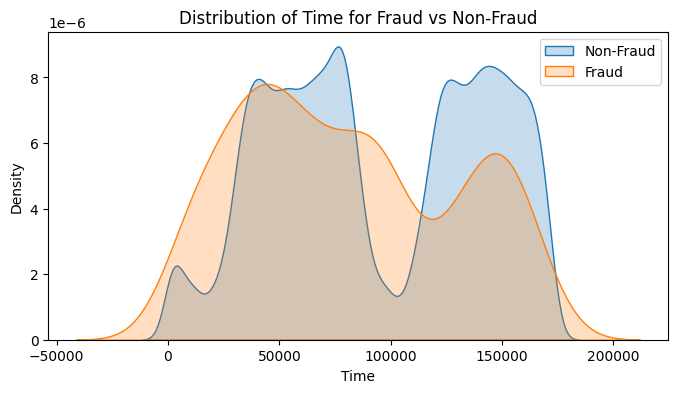

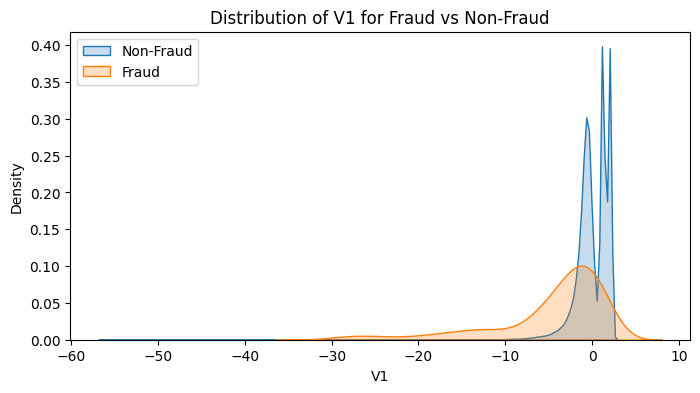

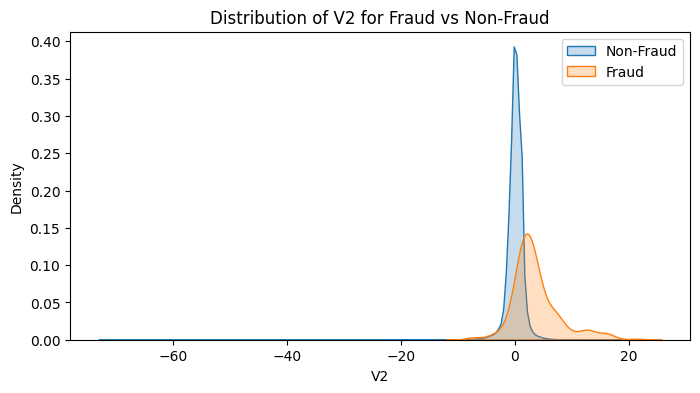

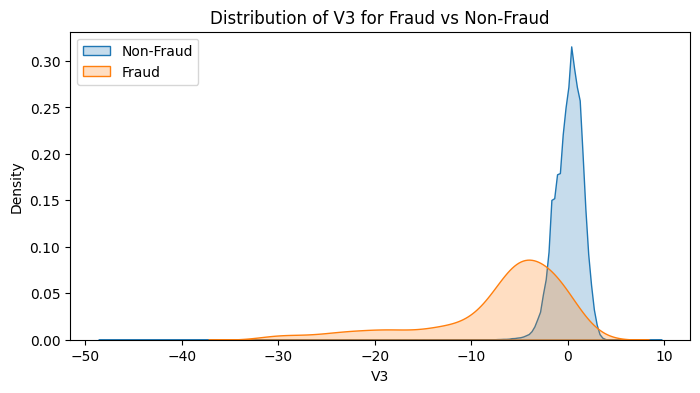

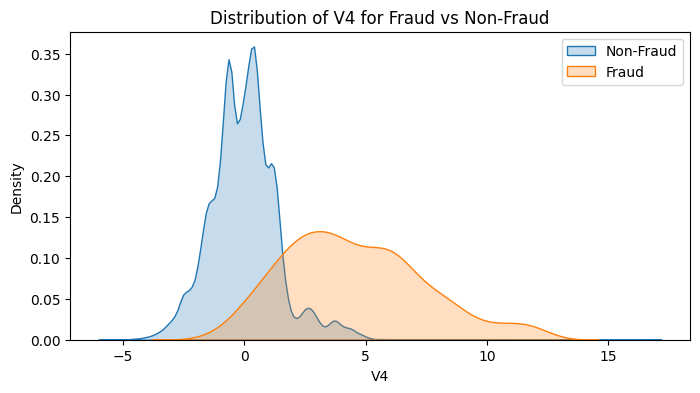

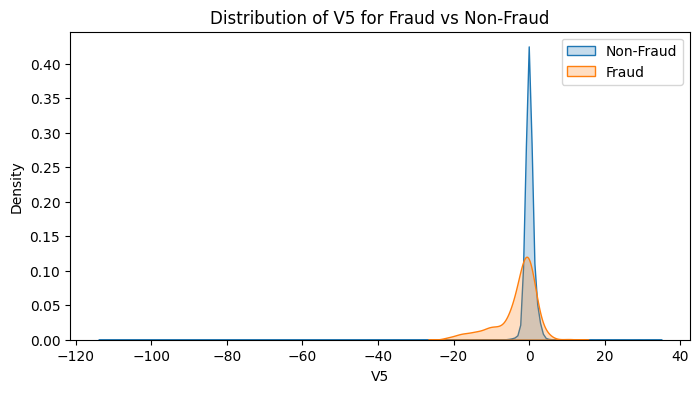

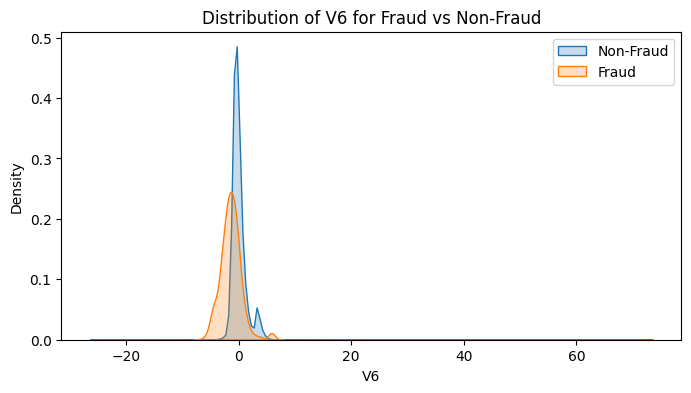

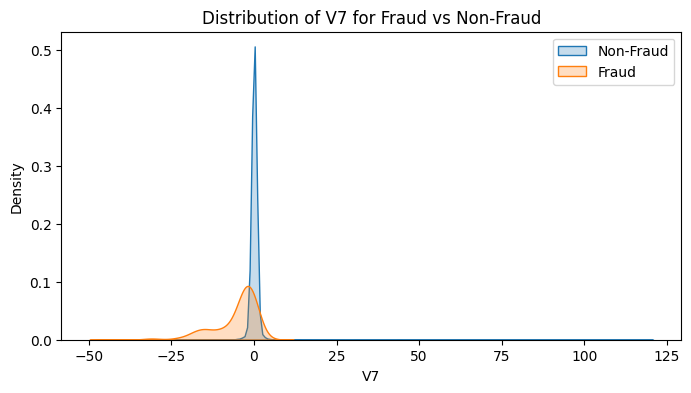

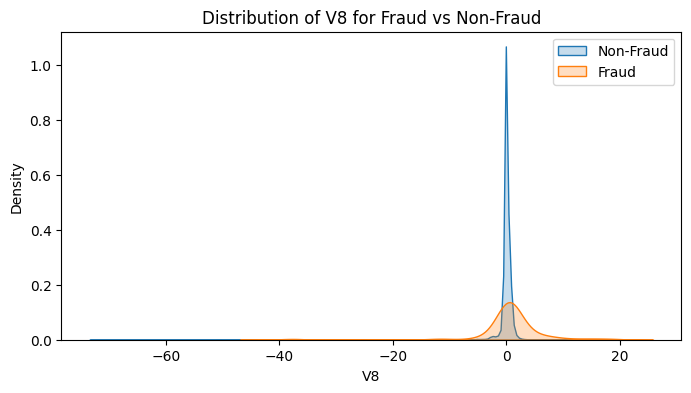

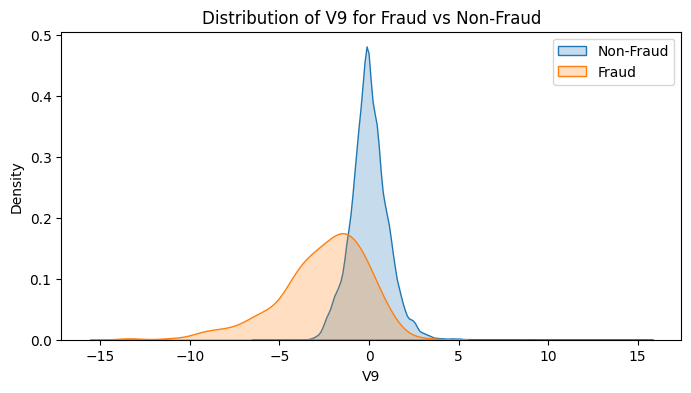

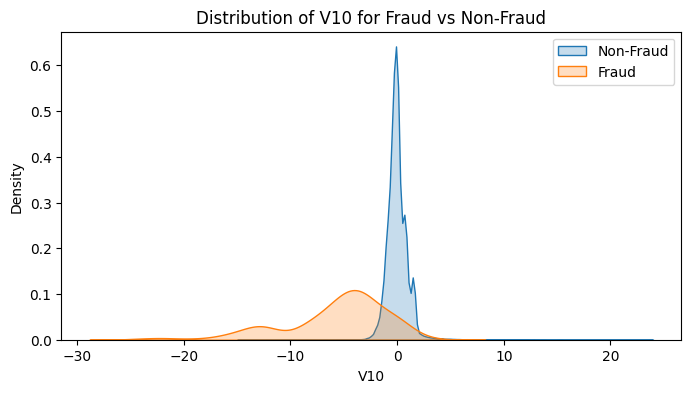

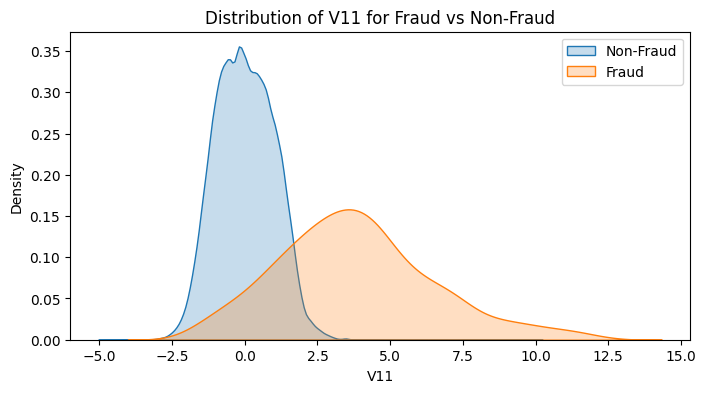

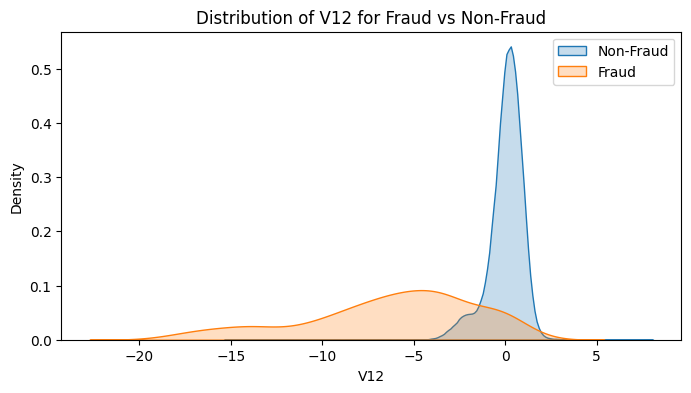

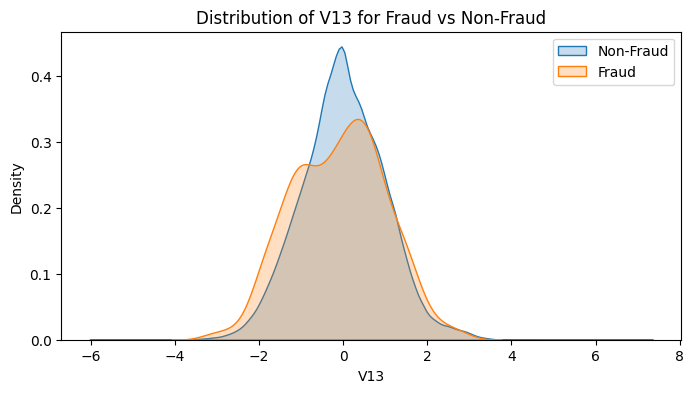

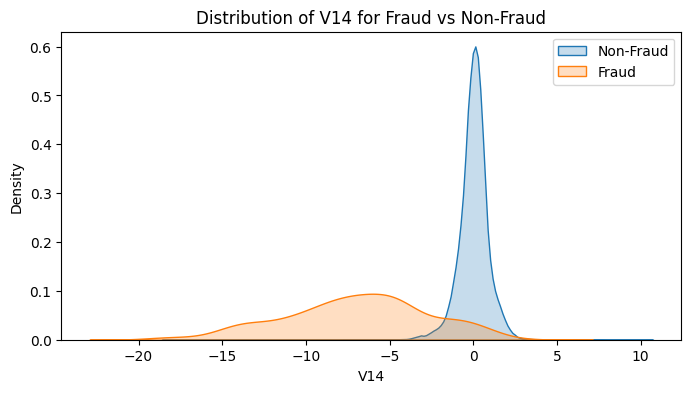

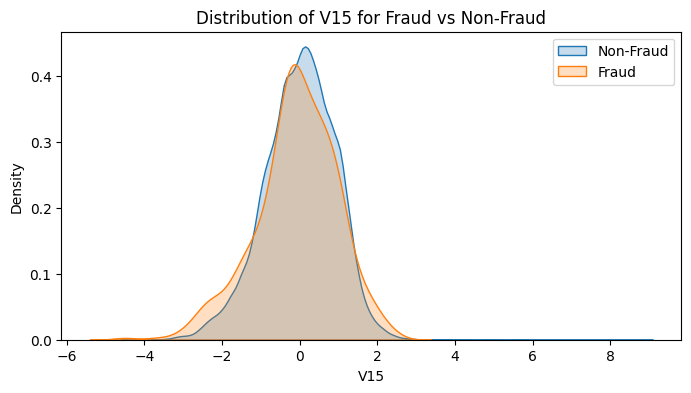

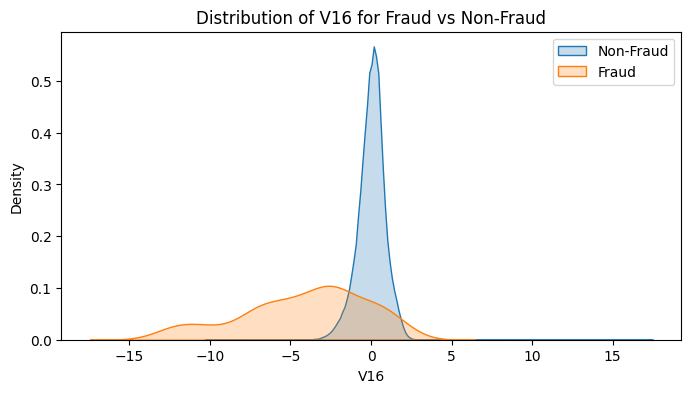

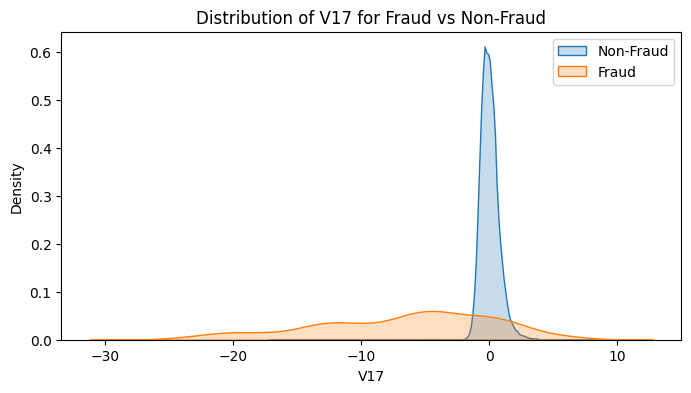

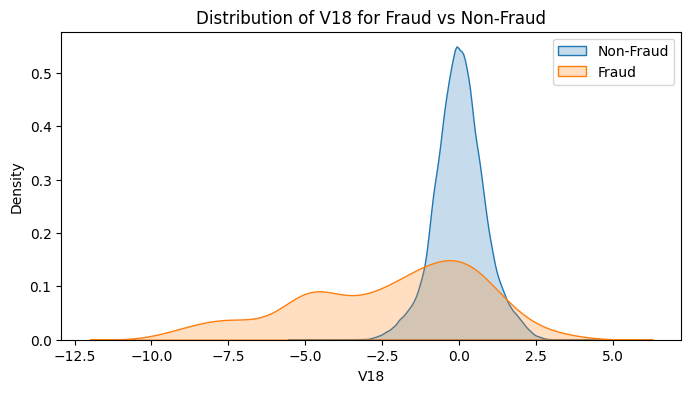

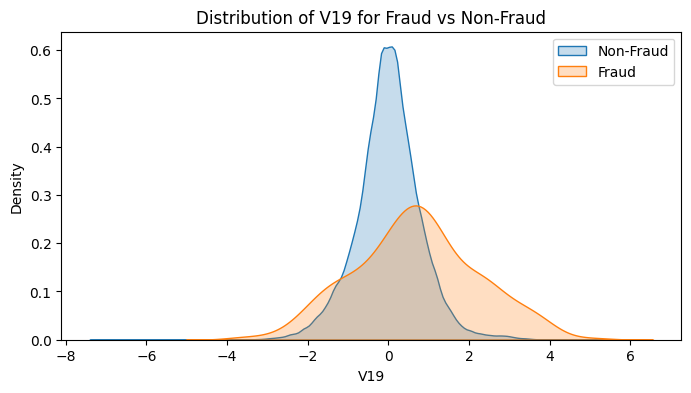

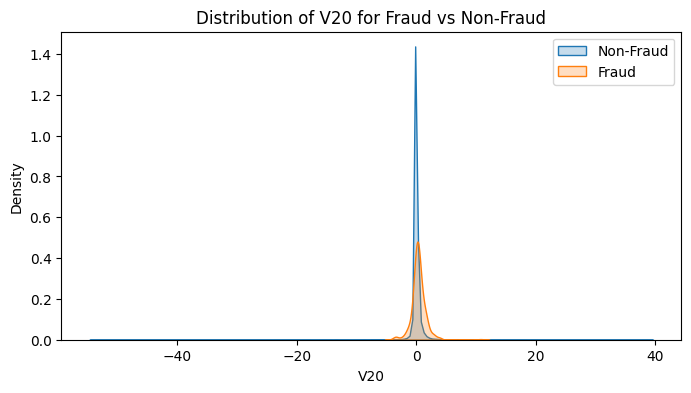

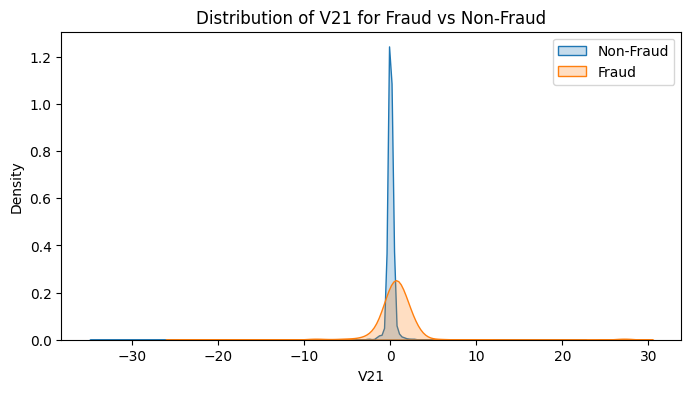

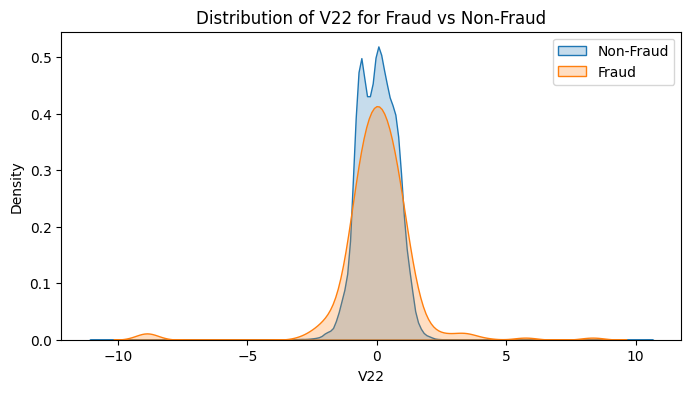

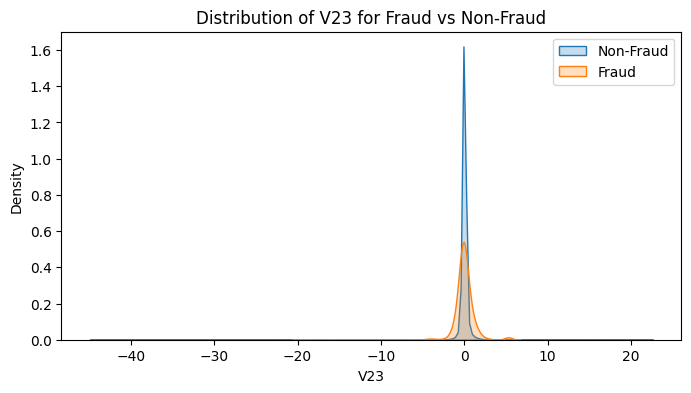

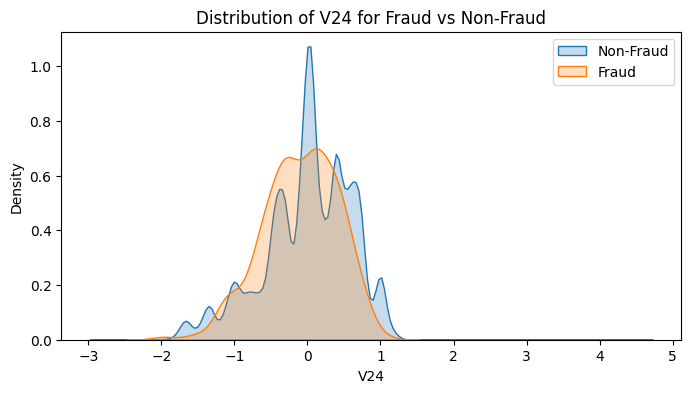

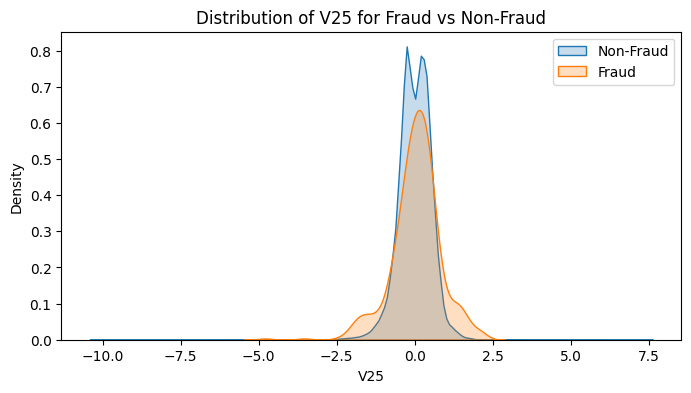

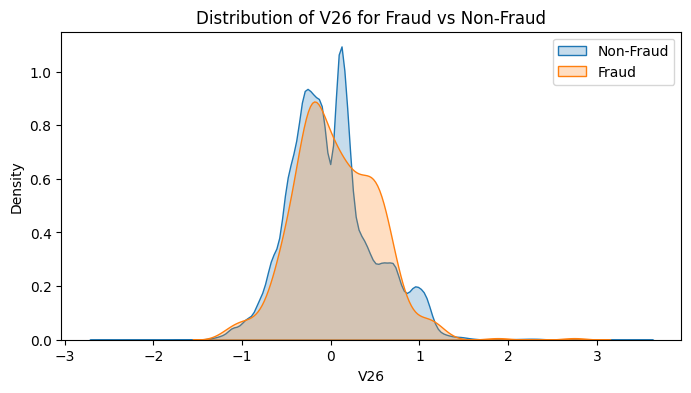

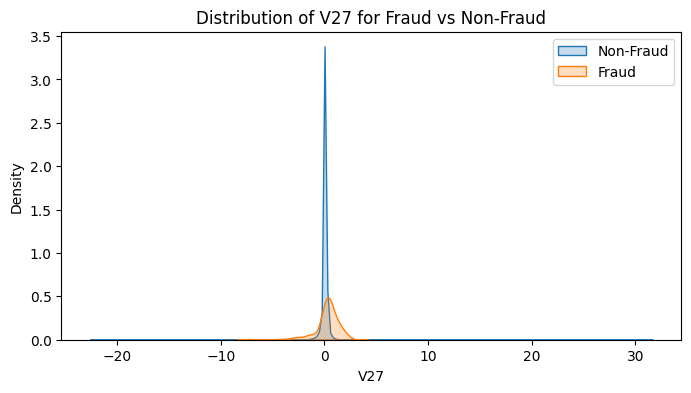

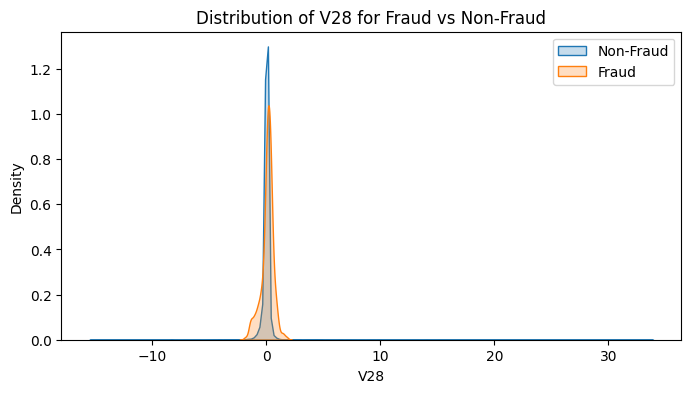

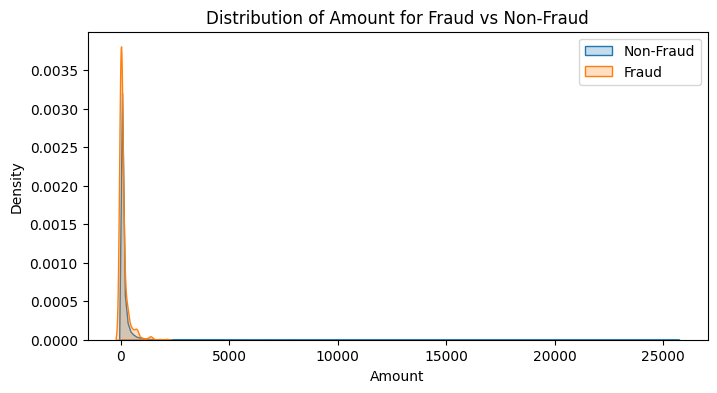

C:\Users\net\AppData\Local\Temp\ipykernel_15268\1997991993.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(non_fraud[column], label="Non-Fraud", fill=True)
C:\Users\net\AppData\Local\Temp\ipykernel_15268\1997991993.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(fraud[column], label="Fraud", fill=True)
C:\Users\net\AppData\Local\Temp\ipykernel_15268\1997991993.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


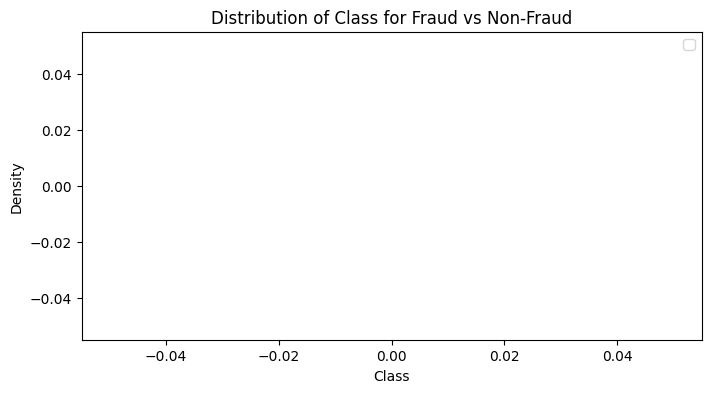

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.columns  # Or specify your numeric columns

for column in numeric_cols:
    plt.figure(figsize=(8,4))
    
    sns.kdeplot(non_fraud[column], label="Non-Fraud", fill=True)
    sns.kdeplot(fraud[column], label="Fraud", fill=True)
    
    plt.title(f"Distribution of {column} for Fraud vs Non-Fraud")
    plt.legend()
    plt.show()


n the KDE plots, the features labeled V1, V2, V3, ... V28 represent PCA-transformed components from the original dataset. Since the original transaction attributes were confidential, PCA was applied to anonymize the data and compress the most informative patterns into numerical components.

By comparing the KDE curves of fraud vs. non-fraud for each PCA component, we can observe whether a particular feature helps separate fraudulent behavior from normal transaction patterns. A larger visible difference between curves indicates a more predictive feature.

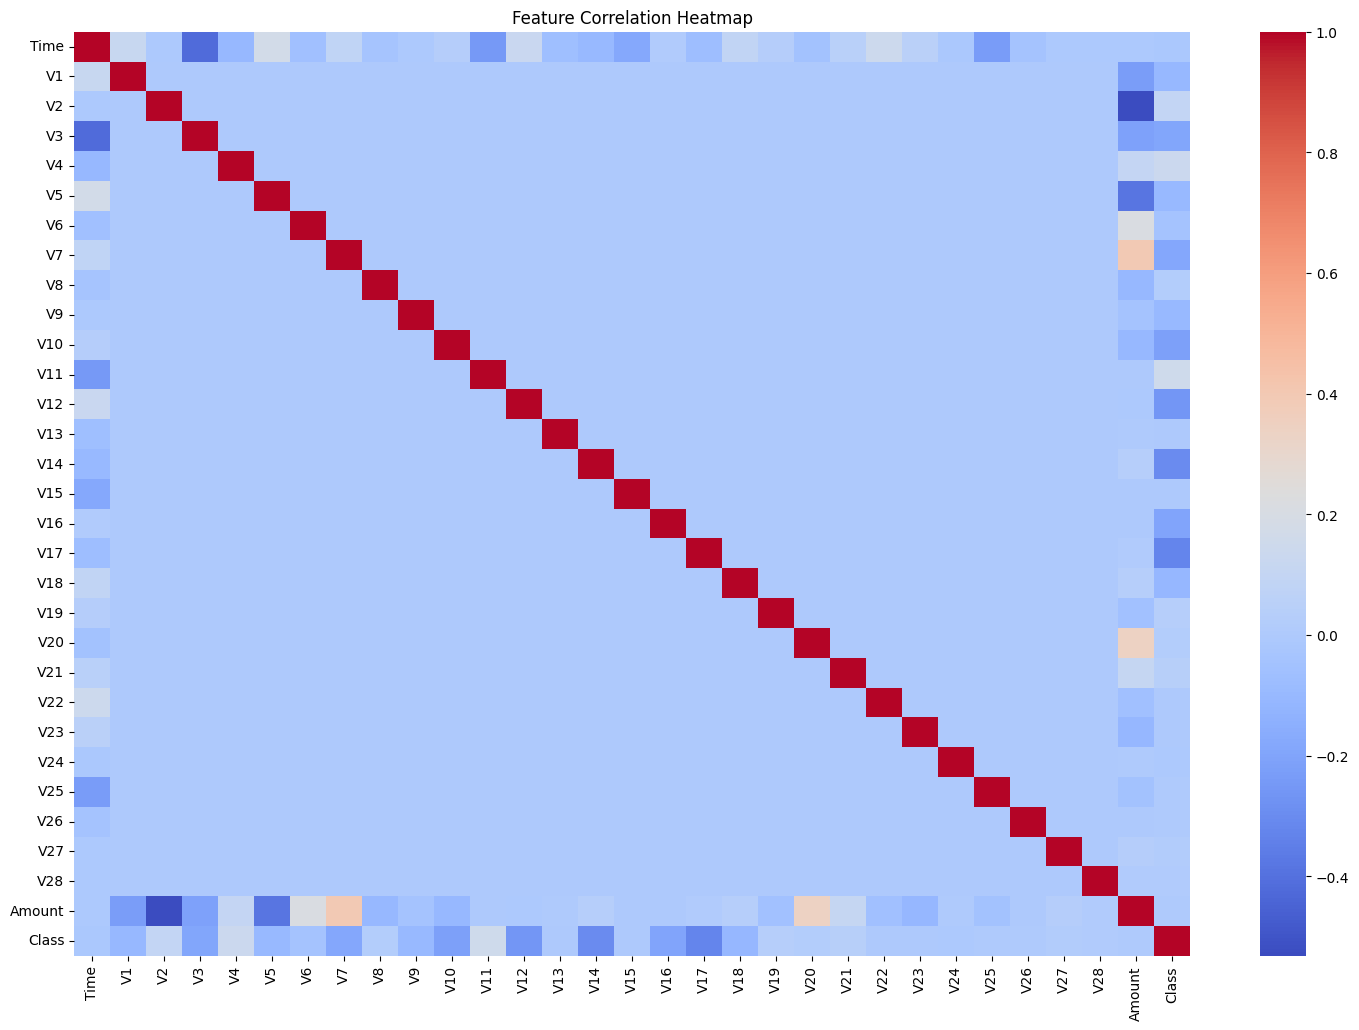

In [28]:
plt.figure(figsize=(18, 12))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


The correlation heatmap shows how features relate to one another and to the target variable. A strong correlation with the Class label indicates features that are more informative for detecting fraud. In this dataset, there are few strong correlations among features, which means most features carry unique information — making ensemble models like Random Forest and XGBoost perform better.

In [13]:
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Score
y_pred_proba = rf.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56849    15]
 [   16    82]]

ROC-AUC Score: 0.973103297664029


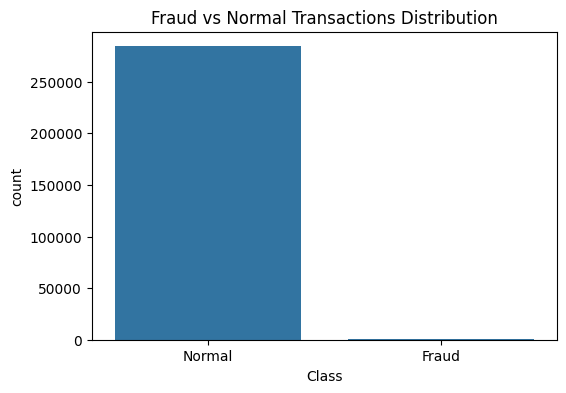

In [37]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions Distribution")
plt.xticks([0,1], ["Normal", "Fraud"])
plt.show()

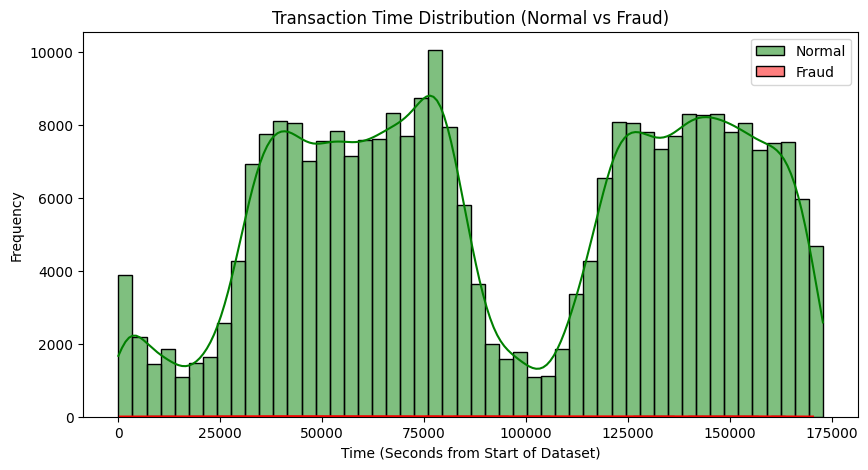

In [41]:
# -------------------- Time-based Fraud Visualization --------------------
plt.figure(figsize=(10,5))
sns.histplot(df[df["Class"]==0]["Time"], bins=50, color="green", label="Normal", kde=True)
sns.histplot(df[df["Class"]==1]["Time"], bins=50, color="red", label="Fraud", kde=True)

plt.title("Transaction Time Distribution (Normal vs Fraud)")
plt.xlabel("Time (Seconds from Start of Dataset)")
plt.ylabel("Frequency")
plt.legend()
plt.show()




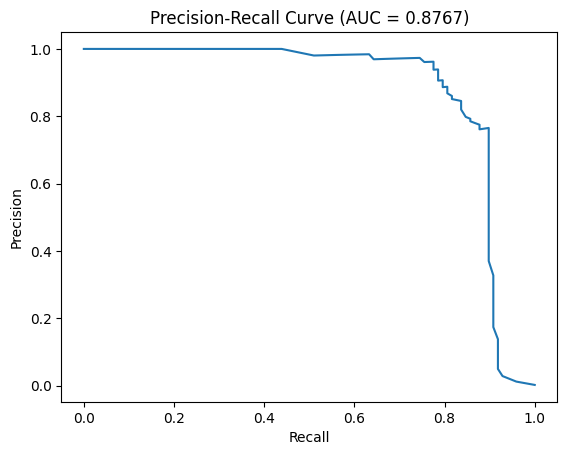

In [14]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision)
plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


### What is the ROC Curve?

The **ROC Curve (Receiver Operating Characteristic Curve)** is a performance evaluation metric used primarily for classification models, especially when the dataset is **imbalanced**, like in fraud detection.

It helps visualize how well the model distinguishes between the positive class (fraud) and negative class (non-fraud) at different probability thresholds.

---

### What Does the ROC Curve Plot?

The ROC curve plots:

| Axis | Meaning |
|------|---------|
| **X-axis:** False Positive Rate (FPR) | How often normal transactions are wrongly predicted as fraud |
| **Y-axis:** True Positive Rate (TPR) / Recall | How many fraud cases are correctly detected |

Formula reminders:

- **TPR (Recall) = TP / (TP + FN)**  
- **FPR = FP / (FP + TN)**

---

###  Why ROC Curve is Useful?

Unlike plain accuracy, the ROC curve shows how the model performs at **different classification thresholds**.  
This is important in fraud detection because:

- Some models may require a **lower threshold** (e.g., 0.3 instead of 0.5) to catch more fraud.
- ROC shows the trade-off between detecting fraud and increasing false alarms.

---

###  What is AUC?

AUC stands for **Area Under the Curve**.

AUC values interpret as:

| AUC Score | Interpretation |
|-----------|---------------|
| **0.90 – 1.0** | Excellent model |
| **0.80 – 0.89** | Good model |
| **0.70 – 0.79** | Fair model |
| **0.50 – 0.69** | Poor model |
| **0.50** | No skill (random guessing) |

Higher AUC means the model is better at separating fraud from non-fraud.

---

###  Why ROC-AUC is Important in Fraud Detection?

- Fraud datasets are **highly imbalanced** → accuracy alone is misleading.
- ROC-AUC evaluates how well the model ranks fraudulent transactions higher than normal ones.
- It gives a **threshold-independent assessment**, making model comparison fair and reliable.

---

### Summary

> **The ROC curve shows the performance of a classifier at various thresholds, and the AUC score measures how well the model separates fraud and non-fraud transactions. A higher AUC means better discrimination capability, which is crucial in fraud detection systems.**


“The ROC curve shows the trade-off between detecting fraud and generating false alerts across different thresholds. The AUC score summarizes this performance, and a higher value means the model is better at distinguishing fraud from normal transactions.”

### Project Summary

The goal of this project was to build a machine learning model capable of detecting fraudulent credit card transactions. Fraud detection is a challenging real-world problem because the dataset is **highly imbalanced**, with legitimate transactions greatly outnumbering fraudulent ones. Traditional accuracy-based evaluation alone is not reliable in such cases, so additional metrics such as **Recall, Precision, F1-Score, and ROC-AUC** were used to measure model performance.

The dataset was preprocessed by scaling numerical features and performing a **stratified train-test split** to preserve the original class distribution. To address the imbalance, **SMOTE (Synthetic Minority Oversampling Technique)** was applied only on the training data to generate synthetic fraud samples and avoid overfitting.

Multiple machine learning models were trained and compared, including **Logistic Regression, Decision Tree, Random Forest, and SVM**. Based on model evaluation results, **Random Forest** demonstrated superior performance in terms of **ROC-AUC, Recall, and overall fraud detection capability**, making it the most suitable model for this problem.

A quick **GridSearchCV hyperparameter tuning** step was applied to improve model performance further. Finally, the trained model and scaler were saved using **pickle** to enable deployment or API integration in real-world fraud monitoring systems.

---


